# Data Analytics on Social Media Content

This project is part of my experience at the **Accenture** [Data Analytics and Visualization](https://www.theforage.com/simulations/accenture-nam/data-analytics-mmlb) job simulation program powered by **The Forage**.

<a target="_blank" href="https://colab.research.google.com/github/javier-cp6/accenture-social-media-data-analytics/blob/main/accenture_social_media_data_analytics.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [ ]:
# !pip install pandas-profiling

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. Load datasets
---

This project is provided with 3 datasets in csv format: `Content`, `Reactions` and `ReactionsType`. Download them in the folder named `data`.

In [ ]:
# Download datasets
content_url = "FILL_WITH_URL"
reaction_types_url = "FILL_WITH_URL"
reactions_url = "FILL_WITH_URL"

!wget  -q --show-progress $content_url -P /content/data
!wget  -q --show-progress $reaction_types_url -P /content/data
!wget  -q --show-progress $reactions_url -P /content/data

In [ ]:
# Load datasets from data folder
content = "/content/data/Content.csv"
reaction_types = "/content/data/ReactionTypes.csv"
reactions = "/content/data/Reactions.csv"

content_df = pd.read_csv(content, index_col=0)
reaction_types_df = pd.read_csv(reaction_types, index_col=0)
reactions_df = pd.read_csv(reactions, index_col=0)

In [ ]:
# Format column names in the datasets
for dataset in [content_df, reaction_types_df, reactions_df]:
  dataset.columns = dataset.columns.str.lower()
  dataset.columns = dataset.columns.str.replace(' ', '_')

### Explore datasets

In [ ]:
content_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   content_id  1000 non-null   object
 1   user_id     1000 non-null   object
 2   type        1000 non-null   object
 3   category    1000 non-null   object
 4   url         801 non-null    object
dtypes: object(5)
memory usage: 46.9+ KB


* *Missing values in the 'url' column are not relevant for the analysis.*

In [ ]:
content_df.head()

,content_id,user_id,type,category,url
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [ ]:
reactions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25553 entries, 0 to 25552
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   content_id  25553 non-null  object
 1   user_id     22534 non-null  object
 2   type        24573 non-null  object
 3   datetime    25553 non-null  object
dtypes: object(4)
memory usage: 998.2+ KB


* *Some reactions are missing values in the 'type' column.*

In [ ]:
reactions_df.head()

,content_id,user_id,type,datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [ ]:
reaction_types_df.sort_values(by='score', ascending=False)

,type,sentiment,score
7,super love,positive,75
9,adore,positive,72
1,want,positive,70
8,cherish,positive,70
6,love,positive,65
0,heart,positive,60
10,like,positive,50
12,intrigued,positive,45
13,peeking,neutral,35
4,interested,positive,30


## 2. Prepare Data
---

### Clean Content dataset

In [ ]:
# Review 'category' values
content_df['category'].unique()

array(['Studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'studying', 'veganism', 'Animals',
       'animals', 'culture', '"culture"', 'Fitness', '"studying"',
       'Veganism', '"animals"', 'Travel', '"soccer"', 'Education',
       '"dogs"', 'Technology', 'Soccer', '"tennis"', 'Culture', '"food"',
       'Food', '"technology"', 'Healthy Eating', '"cooking"', 'Science',
       '"public speaking"', '"veganism"', 'Public Speaking', '"science"'],
      dtype=object)

In [ ]:
# Remove double quotes and lowercase 'category' values to avoid duplicates
content_df['category'] = content_df['category'].str.replace('"', '')
content_df['category'] = content_df['category'].str.lower()
print(content_df['category'].unique())

['studying' 'healthy eating' 'technology' 'food' 'cooking' 'dogs' 'soccer'
 'public speaking' 'science' 'tennis' 'travel' 'fitness' 'education'
 'veganism' 'animals' 'culture']


### Clean Reactions dataset

In [ ]:
# Remove rows with missing values in the 'type' column
reactions_df = reactions_df.dropna(subset=['type'])

## 3. Data Modeling
---

Merge the three datasets into a single one to work with, using the Reactions dataset as a reference.

In [ ]:
# Merge datasets
df = reactions_df.merge(content_df[['content_id', 'category', 'type']],
                        how='left', on="content_id", suffixes=(None,'_content'))
df = df.merge(reaction_types_df, how='left', on="type")
df.head()

,content_id,user_id,type,datetime,category,type_content,sentiment,score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50,studying,photo,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51,studying,photo,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58,studying,photo,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01,studying,photo,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4,interested,2020-08-23 12:25:58,studying,photo,positive,30


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24573 entries, 0 to 24572
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   content_id    24573 non-null  object
 1   user_id       22534 non-null  object
 2   type          24573 non-null  object
 3   datetime      24573 non-null  object
 4   category      24573 non-null  object
 5   type_content  24573 non-null  object
 6   sentiment     24573 non-null  object
 7   score         24573 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 1.7+ MB


In [ ]:
# Save the merged dataset as a csv file
df.to_csv('cleaned_dataset.csv', index=False)

In [ ]:
# Load the cleaned dataset
# pd.read_csv('cleaned_dataset.csv').head()

Create an Excel file to save the cleaned dataset and preliminary results.

In [ ]:
# # Save an Excel file with preliminary results
# with pd.ExcelWriter("results.xlsx") as writer:
#   df.to_excel(writer, sheet_name='cleaned_dataset')

### Transform time-based data

In [ ]:
# Transform reactions' timestamp into datetime format
df['datetime'] = pd.to_datetime(df['datetime'])
df.sort_values('datetime', inplace=True, ignore_index=True)

# Extract year, month and day of week from datetime
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['dayofweek'] = df['datetime'].dt.dayofweek

## 4. Data Analysis
---

The cleaned dataset allows to explore data of content with reactions only.

### Exploratory Data Analysis (EDA)

[pandas-profiling](https://docs.profiling.ydata.ai/latest/) is a great time-saving tool for a fast EDA.

In [ ]:
# from ydata_profiling import ProfileReport

# profile = ProfileReport(df, title="Profiling Report")
# profile.to_file(output_file='output.html')
# profile

Manual exploration

In [ ]:
# Content categories and types
content_categories = list(df['category'].unique())
content_types = list(df['type_content'].unique())

print('Number of categories:', len(content_categories))
display(content_categories)
print('Number of content types:', len(content_types))
display(content_types)

Number of categories: 16


['cooking',
 'studying',
 'food',
 'culture',
 'tennis',
 'healthy eating',
 'technology',
 'dogs',
 'animals',
 'education',
 'soccer',
 'fitness',
 'public speaking',
 'science',
 'veganism',
 'travel']

Number of content types: 4


['video', 'photo', 'GIF', 'audio']

In [ ]:
print('Number of posts:', df['content_id'].nunique())
print('Number of users:', df['user_id'].nunique())

Number of posts: 962
Number of users: 500


In [ ]:
print('Earliest record:',df['datetime'].min())
print('Latest record:', df['datetime'].max())

Earliest record: 2020-06-18 08:07:22
Latest record: 2021-06-18 08:30:29


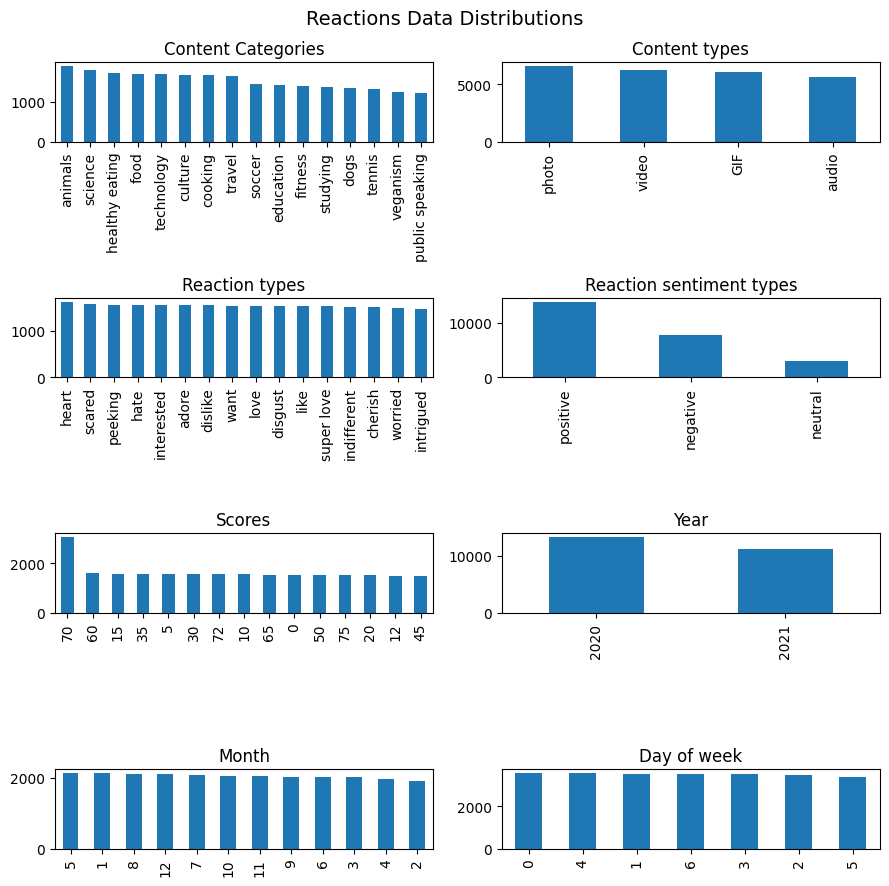

In [ ]:
# Plot reactions data distributions
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(9, 9))

plot_columns = ['category', 'type_content', 'type', 'sentiment',
                'score', 'year', 'month', 'dayofweek']
plot_titles = ['Content Categories', 'Content types', 'Reaction types',
              'Reaction sentiment types', 'Scores', 'Year', 'Month', 'Day of week']

for i, col in enumerate(plot_columns):
    df[col].value_counts().plot(kind='bar', ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_title(f'{plot_titles[i]}')

fig.suptitle('Reactions Data Distributions', fontsize=14)

plt.tight_layout()
plt.show()

### Popularity of Categories


Uncover popular categories based on aggregate score and number of reactions.

In [ ]:
# Group data by category and type of content
grouped_df = df.groupby(['category', 'type_content'])

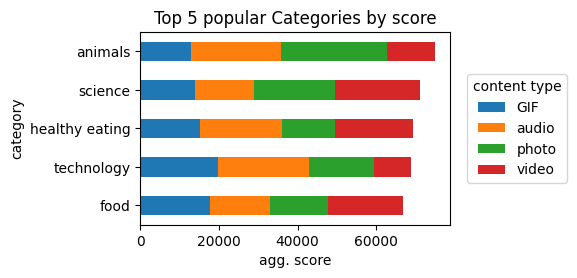

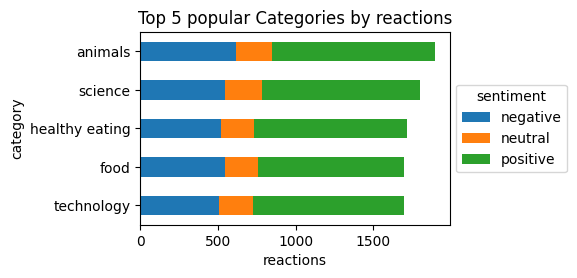

In [ ]:
# Plot popularity of categories by agreggate score and content type
cat_score_df = grouped_df['score'].sum().unstack()
cat_score_idx = cat_score_df.sum(axis=1).sort_values(ascending=False).index
cat_score_df = cat_score_df.loc[cat_score_idx]

cat_score_df[:5].iloc[::-1].plot(kind='barh', stacked=True, figsize=(4, 2.5))

plt.xlabel('agg. score')
plt.title('Top 5 popular Categories by score')
plt.legend(title='content type', loc='center right', bbox_to_anchor=(1.4, 0.50))
plt.show()


# Plot popularity of categories by number of reactions and sentiment
cat_reactions_df = df.groupby('category')['sentiment'] \
  .value_counts().unstack()
cat_reactions_idx = cat_reactions_df.sum(axis=1).sort_values().index
cat_reactions_df = cat_reactions_df.loc[cat_reactions_idx]

cat_reactions_df[-5:].plot(kind='barh', stacked=True, figsize=(4, 2.5))

plt.xlabel('reactions')
plt.title('Top 5 popular Categories by reactions')
plt.legend(title='sentiment', loc='center right', bbox_to_anchor=(1.4, 0.50))
plt.show()

In [ ]:
# Median of reaction scores by category
print("Median of reaction scores:")
df.groupby('category')['score'].median().sort_values(ascending=False)

Median of reaction scores:


category
education          45.0
fitness            45.0
healthy eating     45.0
public speaking    45.0
soccer             45.0
technology         45.0
travel             45.0
animals            35.0
cooking            35.0
culture            35.0
dogs               35.0
food               35.0
science            35.0
studying           35.0
tennis             35.0
veganism           35.0
Name: score, dtype: float64

In [ ]:
# Top 5 categories
top_categories_df = cat_score_df.sum(axis=1).reset_index(name='score')
print("Top 5 popular categories:")
display(top_categories_df.head())

Top 5 popular categories:


,category,score
0,animals,74965
1,science,71168
2,healthy eating,69339
3,technology,68738
4,food,66676


In [ ]:
top_categories_df

,category,score
0,animals,74965
1,science,71168
2,healthy eating,69339
3,technology,68738
4,food,66676
5,culture,66579
6,travel,64880
7,cooking,64756
8,soccer,57783
9,education,57436


In [ ]:
top_categories_share = \
  top_categories_df['score'].head().sum() / top_categories_df['score'].sum() * 100
print(f"Top 5 categories score share: {top_categories_share:.2f}%")

Top 5 categories score share: 36.04%


In [ ]:
# # Append the top 5 categories to the results file
# with pd.ExcelWriter("results.xlsx", mode="a", engine="openpyxl") as writer:
#   top_categories_df.to_excel(writer, sheet_name='categories_popularity')
#   top_categories_df[0:5].to_excel(writer, sheet_name='top_5_categories')

### Popularity of content types


Explore the popularity of content types, including video, photo, GIF, and audio, among categories.


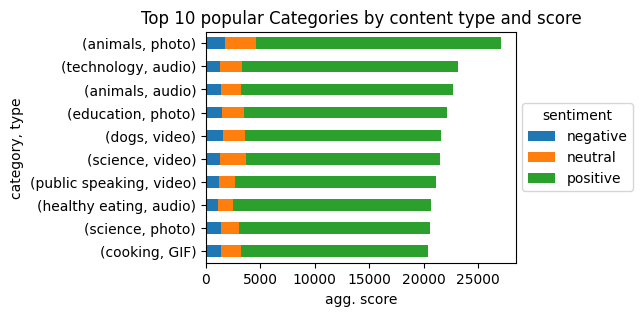

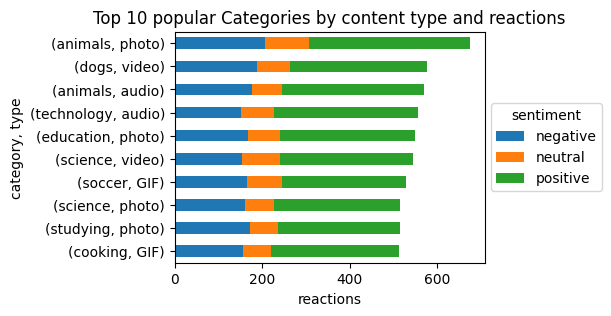

In [ ]:
# Plot popularity of categories by content type and score
cat_types_score_df = df.groupby(['category', 'type_content', 'sentiment']) \
  ['score'].sum().unstack()
cat_types_score_idx = cat_types_score_df.sum(axis=1) \
  .sort_values(ascending=False).index
cat_types_score_df = cat_types_score_df.loc[cat_types_score_idx]

cat_types_score_df[:10].iloc[::-1].plot(kind='barh', stacked=True, figsize=(4, 3))

plt.xlabel('agg. score')
plt.ylabel('category, type')
plt.title('Top 10 popular Categories by content type and score')
plt.legend(title='sentiment', loc='center right', bbox_to_anchor=(1.4, 0.50))
plt.show()


# Plot popularity of categories by content type and number of reactions
cat_types_reactions_df = grouped_df['sentiment'].value_counts().unstack()
cat_types_reactions_idx = cat_types_reactions_df.sum(axis=1).sort_values().index
cat_types_reactions_df = cat_types_reactions_df.loc[cat_types_reactions_idx]

cat_types_reactions_df[-10:].plot(kind='barh', stacked=True, figsize=(4, 3))

plt.xlabel('reactions')
plt.ylabel('category, type')
plt.title('Top 10 popular Categories by content type and reactions')
plt.legend(title='sentiment', loc='center right', bbox_to_anchor=(1.4, 0.50))
plt.show()

In [ ]:
# Median of content type scores
print("Median of content type scores:")
df.groupby(['category', 'type_content'])['score'].median().unstack()

Median of content type scores:


type_content,GIF,audio,photo,video
category,,,,
animals,35.0,45.0,45.0,35.0
cooking,35.0,35.0,35.0,35.0
culture,45.0,35.0,35.0,45.0
dogs,35.0,45.0,45.0,35.0
education,45.0,45.0,45.0,35.0
fitness,45.0,35.0,45.0,45.0
food,45.0,35.0,45.0,35.0
healthy eating,35.0,45.0,45.0,45.0
public speaking,45.0,45.0,35.0,45.0


### Popularity of Categories over time

Analyze how the popularity of categories changes over the one-year period from June 2020 to June 2021.

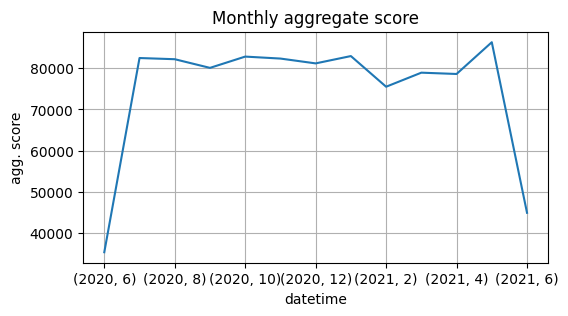

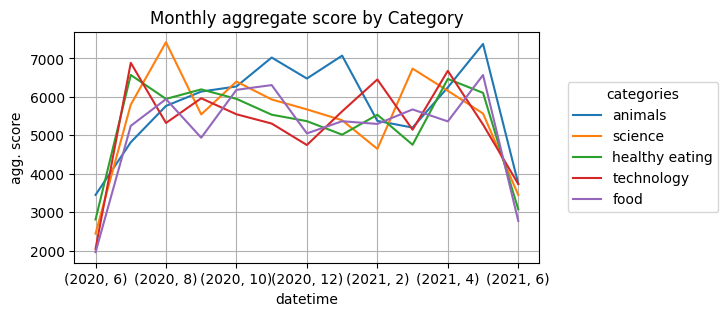

In [ ]:
# Plot monthly aggregate score
monthly_score = df.groupby(['year', 'month'])['score'].sum()
monthly_score.plot(figsize=(6, 3))

plt.xlabel('datetime')
plt.ylabel('agg. score')
plt.title('Monthly aggregate score')
plt.grid(True)
plt.show()


# Plot monthly aggregate score by Category
cat_monthly_score = df.groupby(['category', 'year', 'month'])['score'].sum()
cat_monthly_score = cat_monthly_score.unstack(level=0) \
   [top_categories_df['category'].head()] \

cat_monthly_score.plot(figsize=(6, 3))

plt.xlabel('datetime')
plt.ylabel('agg. score')
plt.title('Monthly aggregate score by Category')
plt.legend(title='categories', loc='center right', bbox_to_anchor=(1.4, 0.50))
plt.grid(True)
plt.show()

In [ ]:
cat_monthly_score.max()

category
animals           7377
science           7421
healthy eating    6570
technology        6885
food              6568
dtype: int64

### Content analysis

Explore content volume (amount of posts) among categories and content types.

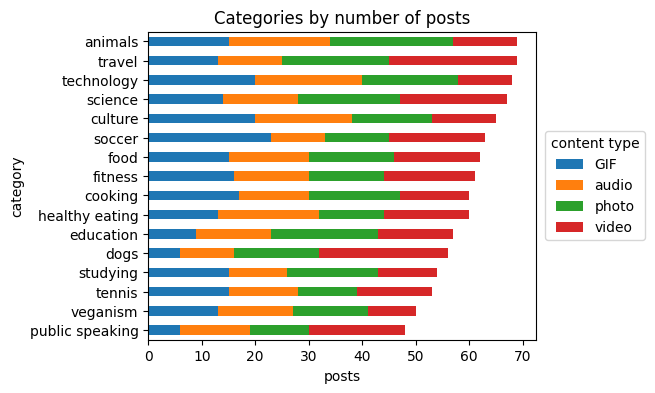

In [ ]:
# Plot categories by number of posts
cat_posts_df = grouped_df['content_id'].nunique().unstack()
cat_posts_idx = cat_posts_df.sum(axis=1).sort_values(ascending=False).index
cat_posts_df = cat_posts_df.loc[cat_posts_idx]

cat_posts_df.iloc[::-1].plot(kind='barh', stacked=True, figsize=(5, 4))
plt.xlabel('posts')
plt.ylabel('category')
plt.title('Categories by number of posts')
plt.legend(title='content type', loc='center right', bbox_to_anchor=(1.30, 0.50))

plt.show()

In [ ]:
top_categories_content_share = \
  cat_posts_df.sum(axis=1).head().sum() / df['content_id'].nunique() * 100
print(f"Top 5 categories content share: {top_categories_content_share:.2f}%")



Top 5 categories score share: 35.14%


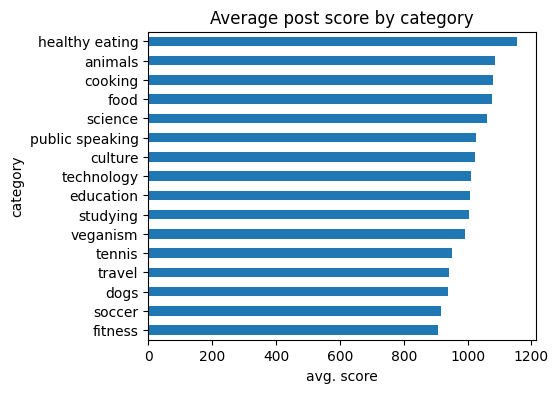

In [ ]:
# Average post score by category
post_score_df = df.groupby(['category', 'content_id'])['score'].sum().unstack(level=0)
post_score_df = post_score_df.mean().sort_values(ascending=False)

post_score_df.iloc[::-1].plot(kind='barh', stacked=True, figsize=(5, 4))
plt.xlabel('avg. score')
plt.ylabel('category')
plt.title('Average post score by category')

plt.show()

In [ ]:
# Average post scores
print("Average post scores by category:")
df.groupby(['category', 'content_id'])['score'].sum().unstack(level=0) \
  .mean().sort_values(ascending=False)

Average post scores by category:


category
healthy eating     1155.650000
animals            1086.449275
cooking            1079.266667
food               1075.419355
science            1062.208955
public speaking    1026.333333
culture            1024.292308
technology         1010.852941
education          1007.649123
studying           1004.981481
veganism            992.380000
tennis              949.792453
travel              940.289855
dogs                937.696429
soccer              917.190476
fitness             906.934426
dtype: float64

The available data include timestamps for reactions but not for content (posts). To analyze content volume over time, we consider the timestamp of the first reaction.


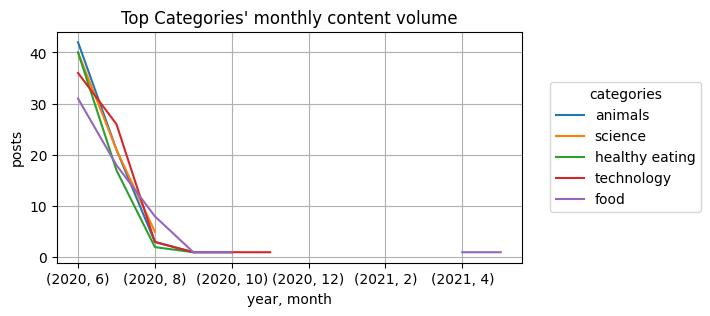

In [ ]:
# Plot monthly content volume
monthly_content_idx = df.groupby(['category', 'content_id'])['datetime'].idxmin()
monthly_content = df.loc[monthly_content_idx]
monthly_content = monthly_content.groupby(['category', 'year', 'month']) \
  .size().unstack(level=0)

monthly_content[top_categories_df['category'].head()].plot(figsize=(6, 3))

plt.xlabel('year, month')
plt.ylabel('posts')
plt.title("Top Categories' monthly content volume")
plt.legend(title='categories', loc='center right', bbox_to_anchor=(1.4, 0.50))
plt.grid(True)
plt.show()

### (Optional) Single category analysis

Analyze a single category in depth.

In [ ]:
categories = ['animals'] # Update categories to analyze

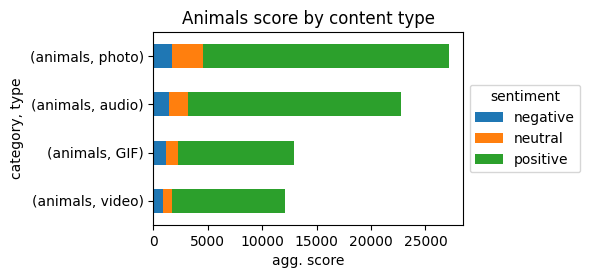

In [ ]:
# Plot score of a single category by content type

for cat in categories:
  cat_types_score_df = df[df['category'] == cat] \
    .groupby(['category', 'type_content', 'sentiment'])['score'] \
    .sum().unstack()
  cat_types_score_idx = cat_types_score_df.sum(axis=1) \
    .sort_values(ascending=False).index
  cat_types_score_df = cat_types_score_df.loc[cat_types_score_idx]

  cat_types_score_df[:10].iloc[::-1].plot(kind='barh', stacked=True, figsize=(4, 2.5))

  plt.xlabel('agg. score')
  plt.ylabel('category, type')
  plt.title(f"{cat.capitalize()} score by content type")
  plt.legend(title='sentiment', loc='center right', bbox_to_anchor=(1.4, 0.50))
  plt.show()

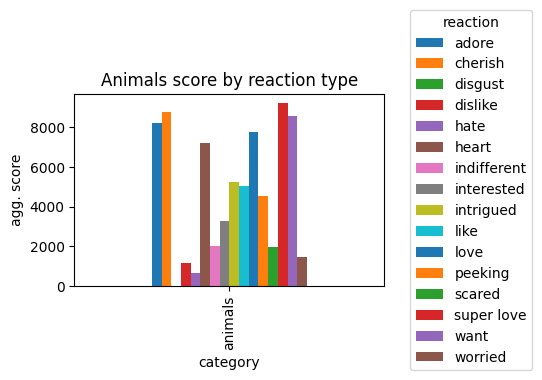

In [ ]:
# Plot score of a single category by reaction type

for cat in categories:
  cat_score_df = df[df['category'] == cat] \
    .groupby(['category', 'type'])['score'].sum().unstack()
  cat_score_idx = cat_score_df.sum(axis=1).sort_values().index
  cat_score_df = cat_score_df.loc[cat_score_idx]

  cat_score_df[:5].iloc[::-1].plot(kind='bar', figsize=(4, 2.5))

  plt.ylabel('agg. score')
  plt.title(f"{cat.capitalize()} score by reaction type")
  plt.legend(title='reaction', loc='center right', bbox_to_anchor=(1.5, 0.50))
  plt.show()